CS5691 - PRML - Assignment Task1

Task 1 :-

Perform polynomial regression on the given datasets 

using training datasets of sizes 10 and 200 
and with different model complexities (2,3,6 and 9)

Repeat the same with Quadratic regularization with different values of Lambda.

PLOT AND COMPARE ALL THE RESULTS.

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [65]:
df = pd.read_csv('function0.csv')
df.head()

,Unnamed: 0,x,y
0,0,-0.513087,1.471849
1,1,1.692695,7.142129
2,2,-0.745941,2.075071
3,3,0.906749,0.656626
4,4,-1.684596,4.188823


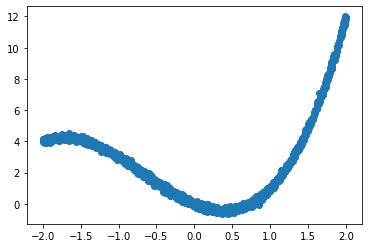

In [83]:
x = np.array(df['x'])
y = np.array(df['y'])
# print(x)
plt.scatter(x,y)

In [84]:
# para = {}
# for i in range(2,10):
#     para[f'x_{i}'] = x**i
    
# print(parameters['x_5'])

def get_parameters(x,deg):
    para = {}
    for i in range(1,deg+1):
        para[f'x_{i}'] = x**i
        
    return para

# para = get_parameters(x,deg)

In [85]:
def design_mat(para,deg,x):
    _ = 2
    d = np.ones(len(x))
    d = np.vstack((d,x))
    while _ <= deg:
        d = np.vstack((d,para[f'x_{_}']))
        _ += 1

    return d.T

In [86]:
def weight_mat(feature,y):
  return np.dot(np.linalg.pinv(feature),y)

In [87]:
deg = 3
para = get_parameters(x,deg)
deg_3 = design_mat(para,deg,x)
print(deg_3)


[[ 1.         -0.51308693  0.2632582  -0.13507434]
 [ 1.          1.69269542  2.86521779  4.84994102]
 [ 1.         -0.74594071  0.55642754 -0.41506195]
 ...
 [ 1.         -0.85110808  0.72438497 -0.6165299 ]
 [ 1.          1.24147598  1.54126262  1.91344053]
 [ 1.          0.53813916  0.28959376  0.15584174]]


In [88]:
w_star = weight_mat(deg_3,y)
print(w_star)

[ 0.00327312 -2.00088282  1.99904886  1.00094202]


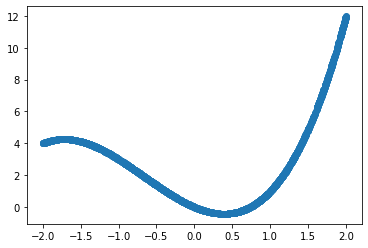

In [89]:
w_star.shape = (4,1)

plt.scatter(x,np.dot(deg_3,w_star))

In [90]:
# Now using only 10 samples from the dataset 
# and comparing for polynomial of degrees 2,3,6 and 9

In [74]:
sample_10 = df.sample(n=10,random_state = 1)

[ 0.0778674   1.72469454 -1.05215418  1.31653348  1.90516941 -1.50621578
  1.96966147 -1.53178674  1.17072872  0.15235362]
[-0.07468188  7.56225715  3.24034942  3.14517134 10.43392189  4.09594567
 11.51244444  3.99801816  2.00766515 -0.29609786]


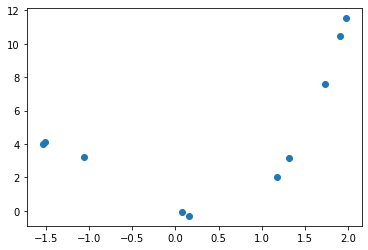

In [112]:
x = np.array(sample_10['x'])
print(x)
print(y)
y = np.array(sample_10['y'])
plt.scatter(x,y)

In [113]:
deg = 2
para = get_parameters(x,deg)
d = design_mat(para,deg,x)
w_star = weight_mat(d,y)
print(d)

[[ 1.          0.0778674   0.00606333]
 [ 1.          1.72469454  2.97457126]
 [ 1.         -1.05215418  1.10702841]
 [ 1.          1.31653348  1.73326039]
 [ 1.          1.90516941  3.62967047]
 [ 1.         -1.50621578  2.26868597]
 [ 1.          1.96966147  3.87956631]
 [ 1.         -1.53178674  2.34637062]
 [ 1.          1.17072872  1.37060573]
 [ 1.          0.15235362  0.02321162]]


In [114]:
print(w_star)

[-0.81095099  0.43627306  2.68319718]


[ 0.0778674   1.72469454 -1.05215418  1.31653348  1.90516941 -1.50621578
  1.96966147 -1.53178674  1.17072872  0.15235362]
[-0.76071043  7.92284798  1.70039801  4.41409648  9.75934466  4.61925944
 10.45800062  4.81654675  3.37741183 -0.68220185]


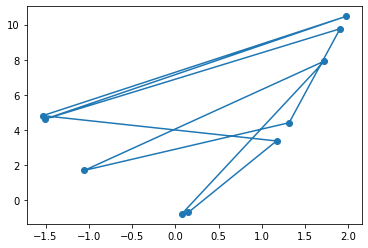

In [115]:
w_star.shape = (3,1)
print(x)
y_hat = np.dot(d,w_star)
y_hat.shape = (10,)


plt.scatter(x,y_hat)
plt.plot(x,y_hat)
print(y_hat)